In [1]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from mlxtend.preprocessing import minmax_scaling

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df=pd.read_csv("USArrests.csv", index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


There are 4 columns in the data set 3 relating to different crimes and 1 to the population of the different cities.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


There is a total of 50 data points for each column.
The data for each of the columns have vastly different means from one another - with assulat having the highest.

In [6]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

The variables differ significantly with assault having the highest variance. The urban population can be assumed to be 
the percentage of the population living in each city which is not comparable to the number of crimes committed in each city.

In [7]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

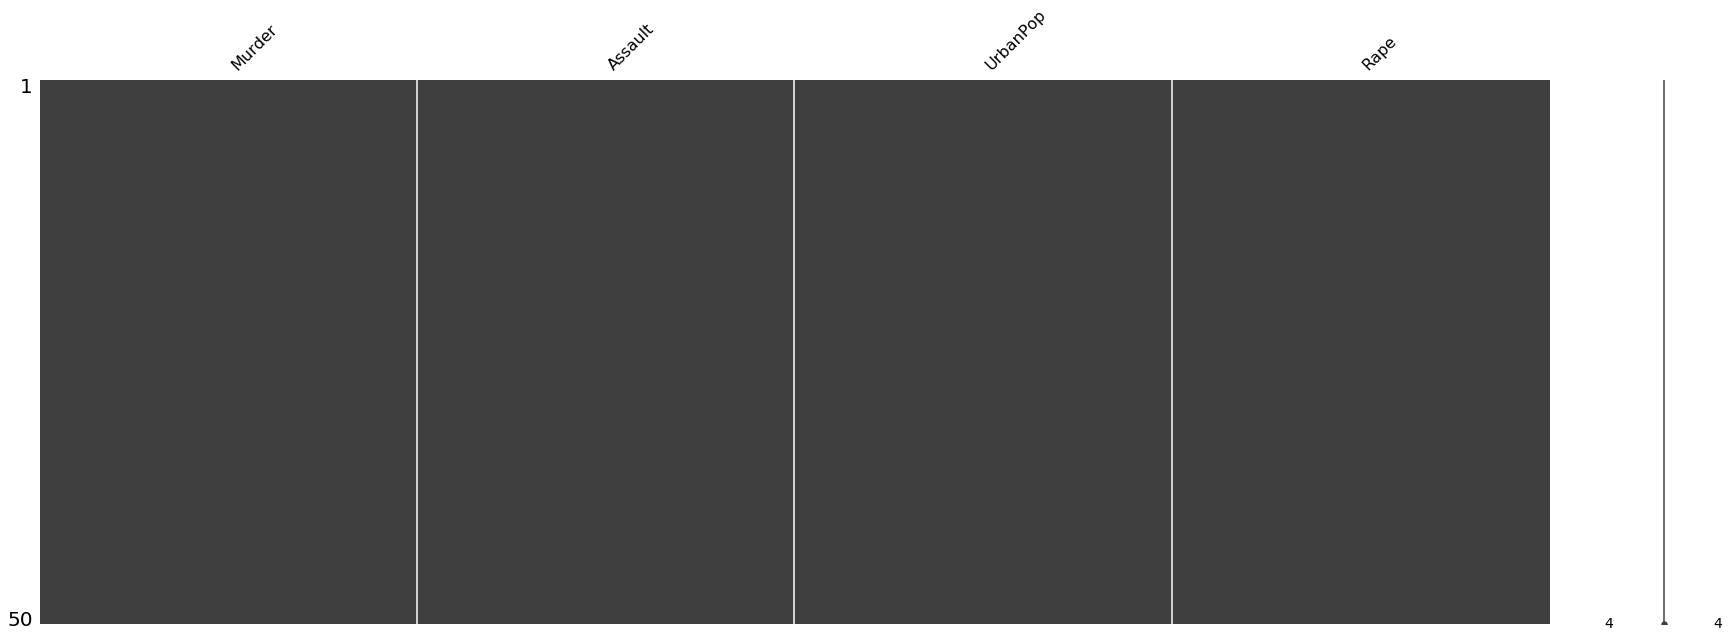

In [8]:
missingno.matrix(df, figsize = (30,10))

There were no missing values present in this dataset so missing values imputation is not necessary.

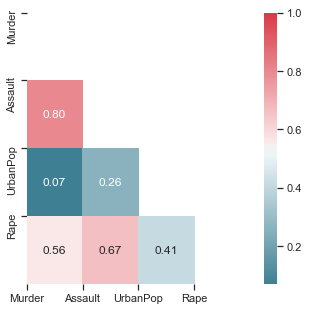

In [9]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
    
def heatMap(df, mirror):

   
   corr = df.corr()
 
   fig, ax = plt.subplots(figsize=(5, 5))
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      plt.xticks(range(len(corr.columns)), corr.columns);
      plt.yticks(range(len(corr.columns)), corr.columns)

   else:
   
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      plt.xticks(range(len(corr.columns)), corr.columns);
      plt.yticks(range(len(corr.columns)), corr.columns)
  
   plt.show()
    
    
heatMap(df, mirror='false')



From the heatmap one can see all the variables have a positive correlation with one anothere. 
There is a strong positive correlation between Assualt and murder, followed by Rape and Assault. This indicates that most people
that are assaulted are murdered and/or raped.

PCA - Unstandardized data

In [10]:
df=pd.read_csv("USArrests.csv", index_col=0)
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(df)


df_2d = pca.transform(df)

df_2d = pd.DataFrame(df_2d)
df_2d.index = df.index
df_2d.columns = ['pca1','pca2', 'pca3', 'pca4']
df_2d.head()

,pca1,pca2,pca3,pca4
City,,,,
Alabama,64.802164,11.448007,-2.494933,2.407901
Alaska,92.827450,17.982943,20.126575,-4.094047
Arizona,124.068216,-8.830403,-1.687448,-4.353685
Arkansas,18.340035,16.703911,0.210189,-0.520994
California,107.422953,-22.520070,6.745873,-2.811826


There are 4 principal components in the data set. 

In [11]:
import math
igenvalues = pca.explained_variance_
SD = [math.sqrt(ig) for ig in igenvalues]
Proportion = [ig/np.sum(ig) for ig in igenvalues]
cumu = [np.cumsum(ig)/np.sum(ig) for ig in igenvalues]

data = {'SD' :SD, "Proportion of Variance": Proportion, 'Cumu': cumu}

df = pd.DataFrame(data, index = ['pca1', 'pca2', 'pca3', 'pca4'])
df


,SD,Proportion of Variance,Cumu
pca1,83.732400,1.0,[1.0]
pca2,14.212402,1.0,[1.0]
pca3,6.489426,1.0,[1.0]
pca4,2.482790,1.0,[1.0]


The proportion of varianace and the cumulative variance is all equivalent to one another for each of the components. 
What differs though is the Standard deviation with Murder having the highest SD as seen during the data exploration above.

PCA - Biplot of unstandardized data

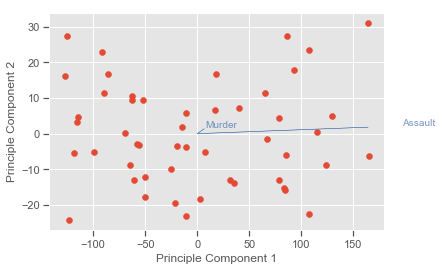

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("USArrests.csv", index_col=0)
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(df)


df_2d = pca.transform(df)

df_2d = pd.DataFrame(df_2d)
df_2d.index = df.index
df_2d.columns = ['pca1','pca2', 'pca3', 'pca4']

plt.style.use('ggplot')
X = df.iloc[:, 0:4]


def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

    
T = pca.transform(X)
ax = draw_vectors(T, pca.components_, df.columns[0:2].values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2', 'component3', 'component4']
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], alpha=1)
plt.show()

Without the data being standardized it makes it difficult to see how cities varies with the other variables, since only Murder and assault are depicted in the biplot above and have the largest positive correlations as mentioned above. Lets standardize the data below and see how it compares.

Standardized Data 

In [13]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [14]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

from sklearn.decomposition import PCA

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [15]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
City,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


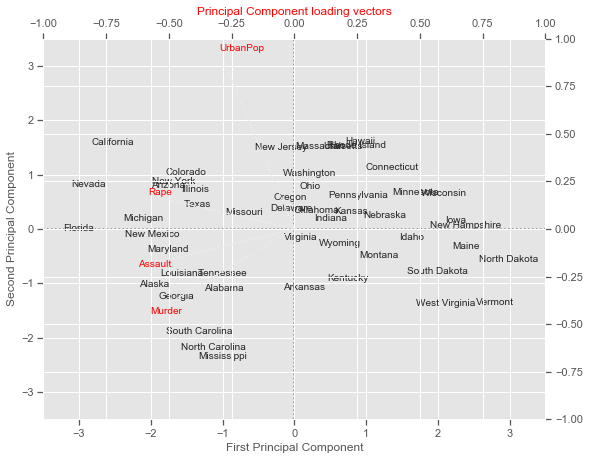

In [16]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

Now in the above plot red coloured words represents the variables and each direction represent the direction which explains the 
most variation. Once the data was standardized there was a "flip" in the direction of the variables from the unstandardized. 
The least variation between the four principle components are between Assualt and Murder.
The second principal component is dominated by Urban Population and rape. 

Standard deviation of the four principal components
np.sqrt(pca.explained_variance_)

In [17]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [18]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

The first principle components explains 62% of the variance, second 24.7%, third 8.91% and the fourth 4.33%.

Scree Plot and Cumulative variance explained

([<matplotlib.axis.XTick at 0x1eca96dc748>,
 <a list of 4 Text xticklabel objects>)

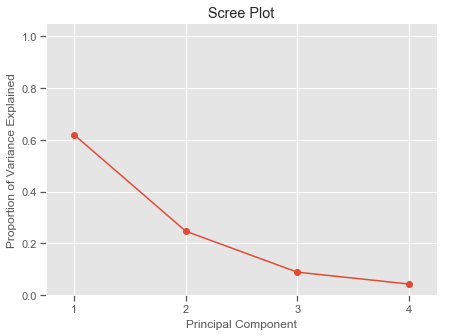

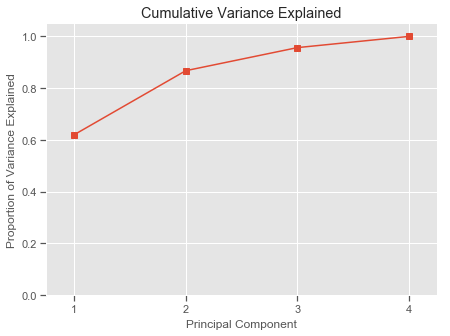

In [19]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.title ("Scree Plot")
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])


plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.title ("Cumulative Variance Explained")
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

The explained variance of the PCs can be summarized graphically. We used scree plot to show the variance for each PC and we 
could choose how many PCs we want to use to explain the whole original dataset by finding a elbow point of the scree plot. 
The first plot graph is the scree plot of the PCA result - Interesting to note as the the number of components increases the
eigenvalue decreases.

The second plot is the cumulative variance The plot shows that the first two components explain close to ~85 % of the variance
in the data. 


Cluster Analysis

Hierarchical clustering

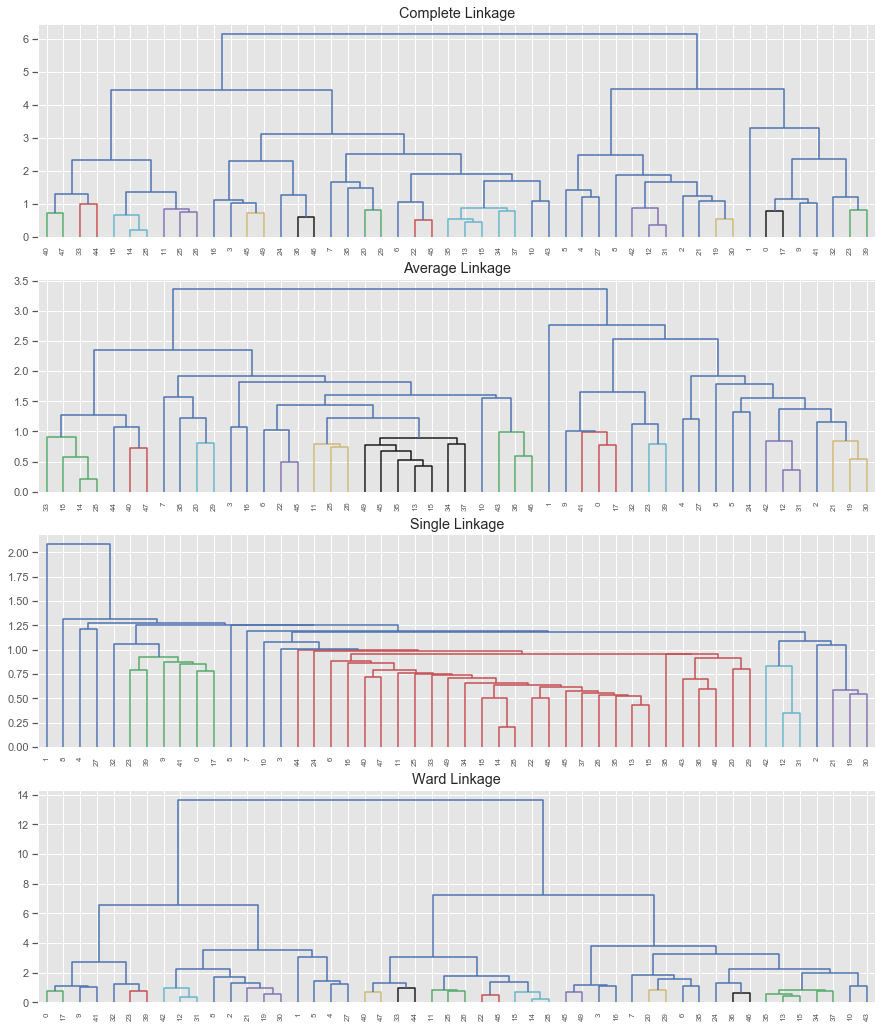

In [20]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X), hierarchy.ward(X)], ['c1','c2','c3', 'c4'],
                                [ax1,ax2,ax3, ax4]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=1)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')
ax4.set_title('Ward Linkage');

Plotted were the various dendrograms for the single, complete, average and ward linkage methods. 
From the Dendrograms above, the ward linkage method creates the most balanced dispersion of clusters and 
will therefore be the method of choice for the rest of this analysis. 

In [21]:
df=pd.read_csv("USArrests.csv")

In [22]:
statesList = df.iloc[:, 0].values # label 
data = df.iloc[:, 1:5].values

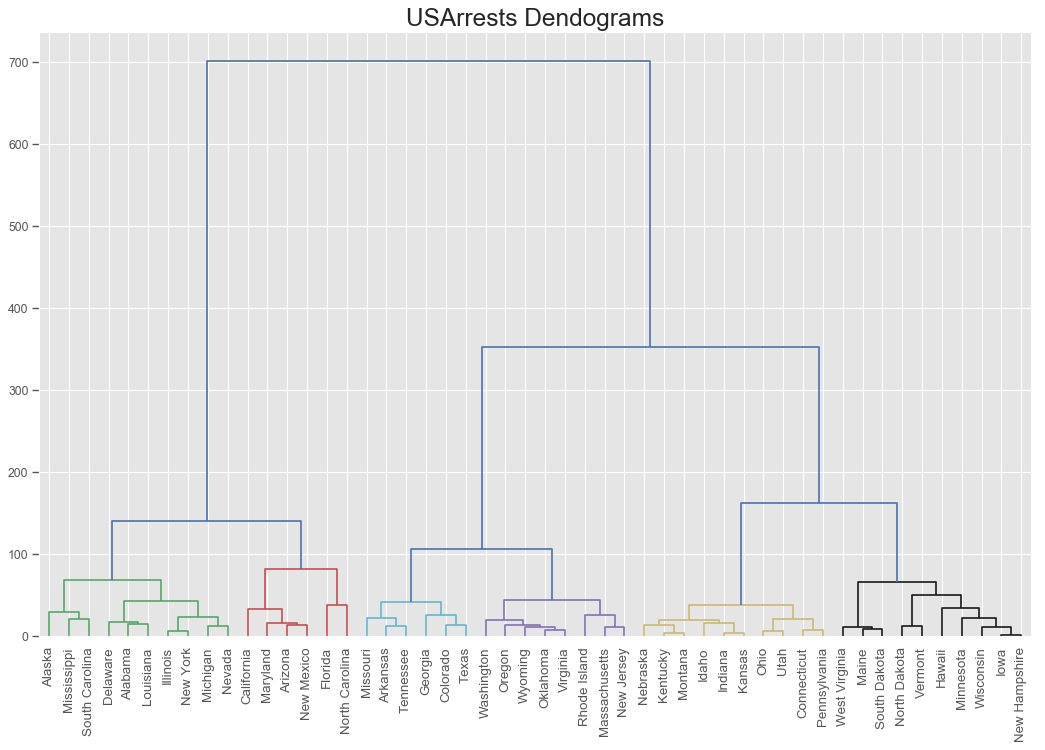

In [23]:
import scipy.cluster.hierarchy as shc

df=pd.read_csv("USArrests.csv")

plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.iloc[:, 0].values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

From the five clusters shown in the dendrogram above, we can see the outcomes of hierarchical clustering have some relationship
with geographic locations of the 50 states. For example, most states in the south are divided into one cluster and Alaska is 
divided into another cluster itself.

In [24]:
df=pd.read_csv("USArrests.csv", index_col=0)
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([1, 1, 2, 0, 2, 0, 3, 1, 2, 0, 4, 3, 1, 3, 4, 3, 3, 1, 4, 2, 0, 1,
       4, 1, 0, 3, 3, 1, 4, 0, 2, 1, 2, 4, 3, 0, 0, 3, 0, 1, 4, 0, 0, 3,
       4, 0, 0, 4, 4, 0], dtype=int64)

You can see the cluster labels from all of the data points. Since we had five clusters, we have five labels in the output 
i.e. 0 to 4.

In [25]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_avg = [] 

i = 4
while i <= 7:
    kmeansClusterer = KMeans(n_clusters=i)
    clusterLabels = kmeansClusterer.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, clusterLabels))
    print ("The silhouette_avg(using all 4 dimensions) is: ", silhouette_avg[-1])
    i+=1

print

The silhouette_avg(using all 4 dimensions) is:  0.33968891433344395
The silhouette_avg(using all 4 dimensions) is:  0.3167479029976481
The silhouette_avg(using all 4 dimensions) is:  0.2777867261979938
The silhouette_avg(using all 4 dimensions) is:  0.2539913426077928


<function print>

Silhouette score - a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates 
that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that
those samples might have been assigned to the wrong cluster.
The Silhouette value for all 4 features is 0.50, 0.449, 0.447 and 0.439 so the sample is inbetween and closer to the decision 
boundary between the neigbouring clusters.

K-means

In [26]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,49.969203
5,6,45.505246
6,7,39.169901
7,8,34.687388
8,9,32.750786
9,10,26.881542


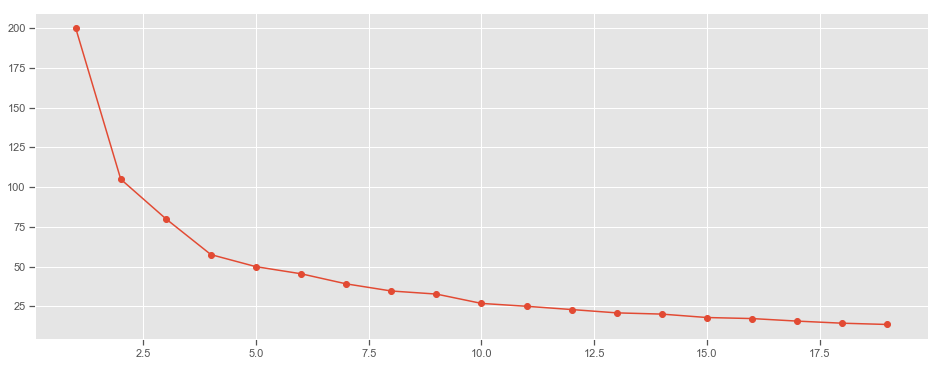

In [27]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

Looking at the plot above it shows the optimum clusters is where the elbow occurs. Now that we have the optimum amount of 
clusters, we can move on to applying K-means (5) clustering to the dataset.

Cluster Plot

In [28]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(5)
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
City,,,,
Alabama,13.2,236,21.2,58
Alaska,10.0,263,44.5,48
Arizona,8.1,294,31.0,80
Arkansas,8.8,190,19.5,50
California,9.0,276,40.6,91


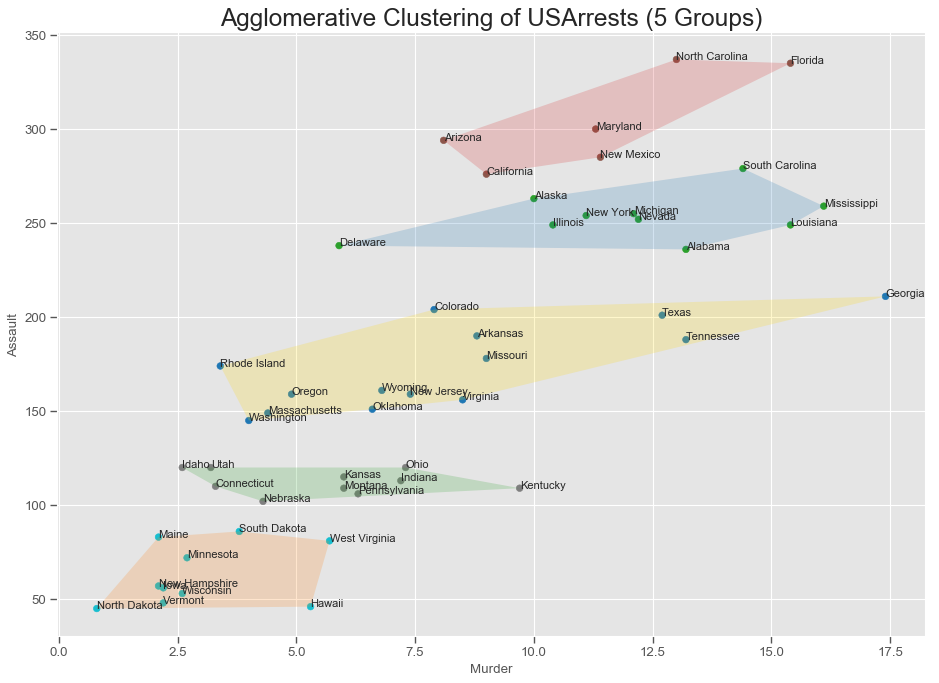

In [29]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

df=pd.read_csv("USArrests.csv", index_col=0)

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

x =df.iloc[:, 0]
y = df.iloc[:, 1]
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  
df2=pd.read_csv("USArrests.csv")
cities = df2.loc[:, "City"]

n =df.iloc[:, 0]
for i, txt in enumerate(cities):
    plt.text(x[i], y[i], txt)

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)
 
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()

Based on the clustering, it seems that K-means has clustered the cities based on assault and murder. The cities with the 
highest level of assualt and murder are in the cities of Florida, North Carolina, Maryland, New Mexico, Arizona and California.
With the lowest levels of Assault and murder occuring in Hawaii, West Virginia, South Dakota, Maine, Mnnesota, New Hampshire,
Wisconsin and North Dakota being the lowest. 

Both hierarchical clustering and K-means separated the same cities based on the level of crime (Assault and Murder).